In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('_datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

_datasets\gender_submission.csv
_datasets\test.csv
_datasets\train.csv


# 1. Get the data

In [2]:
# LOAD TRAIN AND TEST DATA AND PRINT TRAIN HEAD
train_data = pd.read_csv('_datasets/train.csv')
test_data = pd.read_csv('_datasets/test.csv')
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# PRINT COLUMNS
train_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

The attributes have the following meaning:

* **Survived**: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
* **Pclass**: passenger class.
* **Name, Sex, Age**: self-explanatory
* **SibSp**: how many siblings & spouses of the passenger aboard the Titanic.
* **Parch**: how many children & parents of the passenger aboard the Titanic.
* **Ticket**: ticket id
* **Fare**: price paid (in pounds)
* **Cabin**: passenger's cabin number
* **Embarked**: where the passenger embarked the Titanic

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# DESCRIBE NUMERICAL COLUMNS
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Age, Cabin, Embarkment contain null values. 

Cabin attribute is missing most of its values and will be ignored.

PassengerId correspond to index and doesn't bring any value, hence will be ignored.

In [6]:
train_data.drop(['PassengerId', 'Cabin'], axis=1, inplace=True)
test_data.drop(['PassengerId', 'Cabin'], axis=1, inplace=True)

# 2. Explore the data

### 2.1 Survived as prediction target

In [7]:
# COUNT SURVIVED VALUES
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
# OVERALL SURVIVED RATE
train_data.Survived.value_counts()/len(train_data.Survived)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

38% of passengers specified in the dataset have survived. 342 of 891.

### 2.2 Pclass

In [9]:
# SURVIVAL RATE PER CLASS
pd.crosstab(train_data['Pclass'], train_data['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [10]:
# SURVIVAL RATE PER CLASS
pd.crosstab(train_data['Pclass'], train_data['Survived']).apply(lambda r:r/r.sum(), axis=1)

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


Survival rate drops with each lower class.
62% passengers from class 1 have survived, while only 24% from class 3.

### 2.3 Name

In [11]:
# Count how many unique values are in Name attribute
train_data.Name.nunique()

891

Looks as all names are unique and the column name in this form will be not of any use. However each name contains a title which will be explored further.

### Title based on Name
Found in another Kaggle notebook under this [link](https://www.kaggle.com/sinakhorami/titanic-best-working-classifier).

In [12]:
# FIND TITLE IN NAME ATTRIBUTE

import re

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

train_data['Title'] = train_data['Name'].apply(get_title)
print(pd.crosstab(train_data['Title'], train_data['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [13]:
# REPLACE RARE TITLE WITH OTHER CATEGORY
def clean_title(dataset):
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 
                                                 'Rev', 'Sir', 'Jonkheer', 'Dona'], 
                                                'other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

clean_title(train_data)

print (train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4   other  0.347826


In [14]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,other
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr


### 2.4 Sex

In [15]:
# PASSENGER COUNT BY SEX
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
pd.crosstab(train_data['Sex'], train_data['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [17]:
# SURVIVAL RATE BY SEX

pd.crosstab(train_data['Sex'], train_data['Survived']).apply(lambda r:r/r.sum(), axis=1)

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


### 2.5 Age

Age attribute has about 19% missing values, which will be replaced with median.

In [18]:
# PASSENGERS WITH MISSING AGE VALUES
train_data[train_data.isnull().any(axis=1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,Mr
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S,Mr
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C,Mrs
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C,Mr
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q,Miss
...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C,Mr
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S,Miss
868,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S,Mr
878,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S,Mr


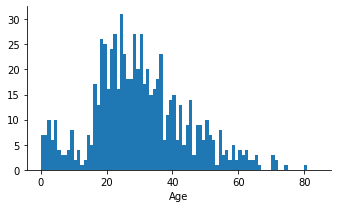

In [19]:
g = sns.FacetGrid(train_data, height=3, aspect=1.6)
bins = np.arange(0, 85, 1)
g.map(plt.hist, 'Age', bins=bins)

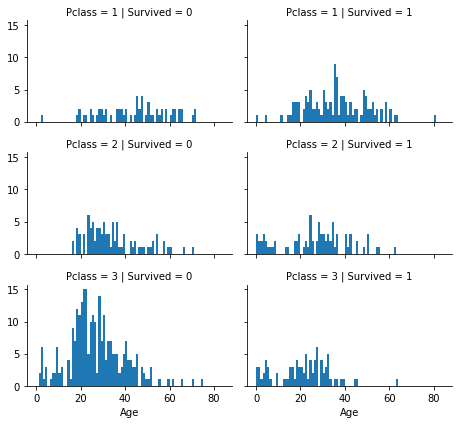

In [20]:
# AGE HISTOGRAM PER PCLASS AND SURVIVED
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', height=2, aspect=1.6)
bins = np.arange(0, 85, 1)
grid.map(plt.hist, 'Age', bins=bins)
grid.add_legend()

In [21]:
train_data['Age'].median()

28.0

In [22]:
train_data[['Age', 'Pclass']].groupby(['Pclass']).median()

,Age
Pclass,
1,37.0
2,29.0
3,24.0


Should filled age data vary between each Pclass?

#### 2.5.1 FILLNA WITH AGE MEDIAN

In [23]:
# FILL MISSING AGE DATA WITH MEDIAN VALUE
train_data_agefill = train_data.copy()
train_data_agefill['Age'] = train_data_agefill['Age'].fillna((train_data_agefill['Age'].median()))
# PRINT SAMPLE VALUES
train_data_agefill.loc[[5, 17, 19]]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
5,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,Mr
17,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,S,Mr
19,1,3,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7.2250,C,Mrs


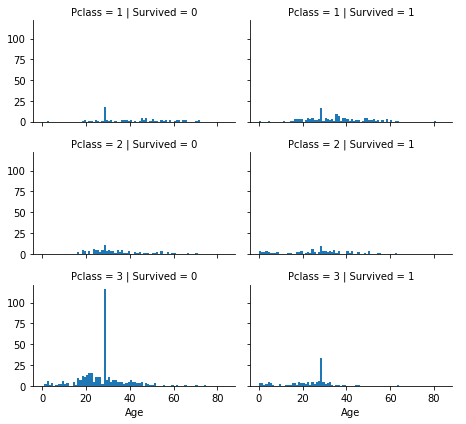

In [24]:
# AGE HISTOGRAM PER PCLASS AND SURVIVED
grid = sns.FacetGrid(train_data_agefill, col='Survived', row='Pclass', height=2, aspect=1.6)
bins = np.arange(0, 85, 1)
grid.map(plt.hist, 'Age', bins=bins)
grid.add_legend()

In [25]:
train_data_agefill['Age'].value_counts()

28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
55.50      1
70.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64

#### 2.5.2 CATEGORISE AGE DATA INTO RANGE GROUPS

In [26]:
# ASSIGN AGE ATTRIBUTE INTO RANGE CATEGORIES AND DROP AGE
def get_age_cat(dataset_):
    dataset = dataset_.copy()
    bins = np.arange(0, 100, 10)
    labels = ['(00-10]', '(10-20]', '(20-30]', '(30-40]', '(40-50]', '(50-60]', '(60-70]', '(70-80]', '(80-90]']
    dataset['Age_group'] = pd.cut(dataset['Age'], bins=bins, labels=labels)
#     dataset.drop(['Age'], axis=1, inplace=True)
    return dataset
    
train_data_agefill = get_age_cat(train_data_agefill)
train_data_agefill

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,(20-30]
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,(30-40]
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,(20-30]
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,(30-40]
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,(30-40]
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,other,(20-30]
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss,(10-20]
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,Miss,(20-30]
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr,(20-30]


In [27]:
pd.crosstab(train_data_agefill['Age_group'], train_data['Survived'])

Survived,0,1
Age_group,,
(00-10],26,38
(10-20],71,44
(20-30],271,136
(30-40],86,69
(40-50],53,33
(50-60],25,17
(60-70],13,4
(70-80],4,1


### 2.6 SibSp and Parch
* **SibSp**: how many siblings & spouses of the passenger aboard the Titanic.
* **Parch**: how many children & parents of the passenger aboard the Titanic.

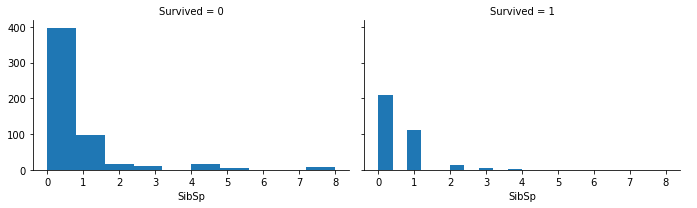

In [28]:
grid = sns.FacetGrid(train_data_agefill, col="Survived", height=3, aspect=1.6)
grid.map(plt.hist, "SibSp")
grid.add_legend()

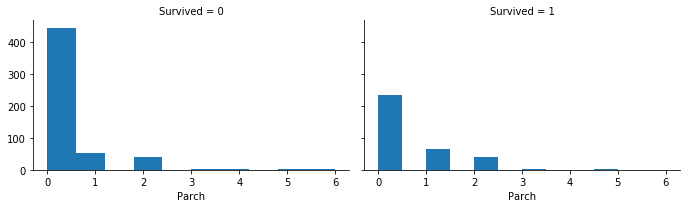

In [29]:
grid = sns.FacetGrid(train_data_agefill, col="Survived", height=3, aspect=1.6)
grid.map(plt.hist, "Parch")
grid.add_legend()

### Specify if passenger is traveling alone or with family based on SibSp and Parch

In [30]:
def get_is_alone_cat(dataset):
    bins = [-1, 0, 20] # two bins with 0 and non-0
    labels=[1, 0] # 1 if alone
    dataset['is_alone'] = pd.cut((dataset['SibSp']+dataset['Parch']), bins=bins, labels=labels)
#     dataset.drop(['SibSp', 'Parch'], axis=1, inplace=True)

get_is_alone_cat(train_data_agefill)
train_data_agefill[['Survived', 'is_alone']].groupby(['Survived', 'is_alone']).size()

Survived  is_alone
0         1           374
          0           175
1         1           163
          0           179
dtype: int64

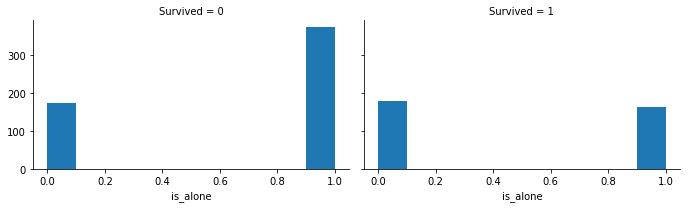

In [31]:
grid = sns.FacetGrid(train_data_agefill, col="Survived", height=3, aspect=1.6)
grid.map(plt.hist, "is_alone")
grid.add_legend()

### 2.7 Ticket

In [32]:
train_data_agefill.Ticket.nunique()

681

In [33]:
train_data_agefill.Ticket.value_counts()

347082      7
1601        7
CA. 2343    7
CA 2144     6
347088      6
           ..
250646      1
345780      1
250648      1
343276      1
237671      1
Name: Ticket, Length: 681, dtype: int64

Ticket attribute doesn't provide useful information and will be dropped.

### 2.8 Fare

Fare    AxesSubplot(0.125,0.657941;0.227941x0.222059)
dtype: object

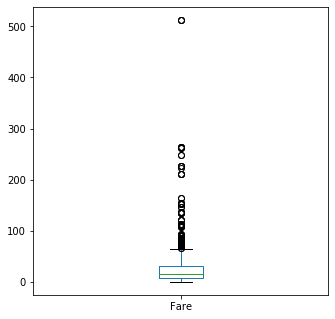

In [34]:
train_data_agefill[['Fare']].plot.box(subplots=True, layout=(3, 3), figsize=(18,18))

In [35]:
Q1, Q3 = train_data_agefill.Fare.quantile([0.25, 0.75])
Q1, Q3

(7.9104, 31.0)

In [36]:
IQR = Q3 - Q1
IQR

23.0896

In [37]:
upper_whisker = Q3 + 1.5 * IQR
upper_outliers = train_data_agefill[train_data_agefill['Fare'] > upper_whisker]
len(upper_outliers)/len(train_data_agefill)

0.13019079685746351

In [38]:
lower_whisker = Q1 - 1.5 * IQR
lower_outliers = train_data_agefill[train_data_agefill['Fare'] < lower_whisker]
len(lower_outliers)/len(train_data)

0.0

In [39]:
Q2 = train_data_agefill.Fare.quantile(0.5)
data_max = train_data_agefill.Fare.max()
data_min = train_data_agefill.Fare.min()

test = [lower_whisker, Q1, Q2, Q3, upper_whisker, data_max]

# test3 = pd.cut(train_data_agefill.Fare, bins=test, labels = ['1', '2', '3', '4', '5'])
# test3

# test3.value_counts() / len(test3)
test

[-26.724, 7.9104, 14.4542, 31.0, 65.6344, 512.3292]

Fare will be devided into 5 range categories

#### 2.8.2 CATEGORISE FARE INTO RANGE GROUPS

In [40]:
# ASSIGN AGE ATTRIBUTE INTO RANGE CATEGORIES AND DROP AGE
def get_fare_cat(dataset_):
    dataset = dataset_.copy()
    Q1, Q2, Q3 = dataset.Fare.quantile([0.25, 0.5, 0.75])
    LW, UW = Q1 - 1.5 * (Q3 - Q1), Q3 + 1.5 * (Q3 - Q1)
    df_max = dataset.Fare.max()
    bins = [LW, Q1, Q2, Q3, UW, df_max]

    labels = ['1', '2', '3', '4', '5']
    dataset['Fare_group'] = pd.cut(dataset['Fare'], bins=bins, labels=labels)
    return dataset
    
train_data_agefill = get_fare_cat(train_data_agefill)
train_data_agefill

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_group,is_alone,Fare_group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,(20-30],0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,(30-40],0,5
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,(20-30],1,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,(30-40],0,4
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,(30-40],1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,other,(20-30],1,2
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss,(10-20],1,3
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,Miss,(20-30],0,3
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr,(20-30],1,3


In [41]:
pd.crosstab(train_data_agefill['Fare_group'], train_data['Survived'])

Survived,0,1
Fare_group,,
1,179,44
2,156,68
3,121,101
4,56,50
5,37,79


### 2.9 Embarked

In [42]:
# COUND MISSING DATA IN EMBARKED
train_data_agefill.Embarked.isnull().sum()

2

In [43]:
train_data_agefill.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Embarked missing data will be filled with most frequent attribute

In [44]:
train_data_agefare_fill = train_data_agefill.copy()
train_data_agefare_fill['Embarked'].fillna(train_data_agefill['Embarked'].value_counts()[0])

train_data_agefare_fill

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Age_group,is_alone,Fare_group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,(20-30],0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,(30-40],0,5
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,(20-30],1,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,(30-40],0,4
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,(30-40],1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,other,(20-30],1,2
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss,(10-20],1,3
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,Miss,(20-30],0,3
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr,(20-30],1,3


### 2.10 Select data

In [45]:
data = train_data_agefare_fill[['Survived', 'Pclass', 'Sex', 'Embarked', 'Title', 'Age_group', 'is_alone', 'Fare_group']]
data

,Survived,Pclass,Sex,Embarked,Title,Age_group,is_alone,Fare_group
0,0,3,male,S,Mr,(20-30],0,1
1,1,1,female,C,Mrs,(30-40],0,5
2,1,3,female,S,Miss,(20-30],1,2
3,1,1,female,S,Mrs,(30-40],0,4
4,0,3,male,S,Mr,(30-40],1,2
...,...,...,...,...,...,...,...,...
886,0,2,male,S,other,(20-30],1,2
887,1,1,female,S,Miss,(10-20],1,3
888,0,3,female,S,Miss,(20-30],0,3
889,1,1,male,C,Mr,(20-30],1,3


# 3. Prepare the data
### 3.1 Split data into train and test set

In [46]:
from sklearn.model_selection import train_test_split

train_data = pd.read_csv('_datasets/train.csv')
test_data = pd.read_csv('_datasets/test.csv')

X = train_data.drop(['Survived'], axis=1)
y = train_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

### 3.2 Construct classes for pipeline 20200407

In [48]:
# def get_age_cat(dataset):
#     bins = np.arange(0, 100, 10)
#     labels = ['(00-10]', '(10-20]', '(20-30]', '(30-40]', '(40-50]', '(50-60]', '(60-70]', '(70-80]', '(80-90]']
#     dataset['Age_group'] = pd.cut(dataset['Age'], bins=bins, labels=labels)
#     dataset.drop(['Age'], axis=1, inplace=True)

class AgeCategory(BaseEstimator, TransformerMixin):
    """
    Creates new attribute based on Age data
    Converts input into DataFrame with provided column names
    """
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
#         print('in AgeCategory10')
#         print(X)
        bins = np.arange(0, 100, 10)
#         labels = ['(00-10]', '(10-20]', '(20-30]', '(30-40]', '(40-50]', '(50-60]', '(60-70]', '(70-80]', '(80-90]']
        labels = np.arange(0, 9) #[1, 2, 3, 4, 5, 6, 7, 8, 9]
        X['AgeGroup'] = pd.cut(X['Age'], bins=bins, labels=labels)
#         X[6] = pd.cut(X[1], bins=bins, labels=labels)
        # X.drop(['Age'], axis=1, inplace=True)
        return X

In [49]:
a = np.arange(0,100,10)
a

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [50]:
# def get_fare_cat(dataset_):
#     dataset = dataset_.copy()
#     Q1, Q2, Q3 = dataset.Fare.quantile([0.25, 0.5, 0.75])
#     LW, UW = Q1 - 1.5 * (Q3 - Q1), Q3 + 1.5 * (Q3 - Q1)
#     df_max = dataset.Fare.max()
#     bins = [LW, Q1, Q2, Q3, UW, df_max]

#     labels = ['1', '2', '3', '4', '5']
#     dataset['Fare_group'] = pd.cut(dataset['Fare'], bins=bins, labels=labels)
#     return dataset

class FareCategory(BaseEstimator, TransformerMixin):
    """ Split Fare attribute into groups """
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
#         bins = np.arange(0, 100, 10)
# #         labels = ['(00-10]', '(10-20]', '(20-30]', '(30-40]', '(40-50]', '(50-60]', '(60-70]', '(70-80]', '(80-90]']
#         labels = np.arange(0, 9) #[1, 2, 3, 4, 5, 6, 7, 8, 9]
#         X['AgeGroup'] = pd.cut(X['Age'], bins=bins, labels=labels)
        bins = [-1, 8, 15, 31, 66]
        labels = np.arange(0, 4)
        X['FareGroup'] = pd.cut(X['Fare'], bins=bins, labels=labels)
        return X

In [51]:
# def get_is_alone_cat(dataset):
#     bins = [-1, 0, 20] # two bins with 0 and non-0
#     labels=[1, 0] # 1 if alone
#     dataset['is_alone'] = pd.cut((dataset['SibSp']+dataset['Parch']), bins=bins, labels=labels)
#     dataset.drop(['SinSp', 'Parch'])

# Is alone based on SibSp and Parch values

class IsAloneCategory(BaseEstimator, TransformerMixin):
    """
    Creates new attribute based on SibSp and Parch. 
    """
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        bins = [-1, 0, 20] # two bins with 0 and non-0
        labels=[1, 0] # 1 if alone
        X['IsAlone'] = pd.cut((X['SibSp']+X['Parch']), bins=bins, labels=labels)
#         X[7] = pd.cut((X[2]+X[3]), bins=bins, labels=labels)
        # X.drop(['SibSp', 'Parch'], axis=1, inplace=True)
        return X

In [52]:
# def get_title(name):
#     title_search = re.search(' ([A-Za-z]+)\.', name)
#     # If the title exists, extract and return it.
#     if title_search:
#         return title_search.group(1)
#     return ""

# train_data['Title'] = train_data['Name'].apply(get_title)
# print(pd.crosstab(train_data['Title'], train_data['Sex']))

class NamesTitle(BaseEstimator, TransformerMixin):
    """
    Creates new attrubute based on Name string content
    Defines internal methods: get_title and clean_titles
    """
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        # pull title from Name column
        X['Titles'] = X['Name'].apply(self.get_title)
        # set unique titles (count<10) as 'other'
        X['Titles'] = self.clean_titles(X['Titles'])
        return X
    def get_title(self, name):
        """" Pull title. from Name """
        title_search = re.search(' ([A-Za-z]+)\.', name)
        # If the title exists, extract and return it.
        if title_search:
            return title_search.group(1)
        return ""
    def clean_titles(self, titles):
        """ Count title occurrence and set n<10 as 'other'. """
#         print(type(titles))
#         print(titles)
        titles_count = titles.value_counts()
        unique_titles = titles_count[titles_count < 20].index.tolist()
        titles = titles.replace(unique_titles, 'other')
        return titles

In [53]:
class PipelineSummary(BaseEstimator, TransformerMixin):
    def __init__(self, col_name=None):
        self.col_name = col_name 
    def fit(self, X, y=None):
        return self
    def transform(self, X):
#         print('** Summary **')
#         print(X.shape)
#         print(type(X))
        X = pd.DataFrame(X, columns=self.col_name)
#         print(X.head(10))
#         print('* * * * *')
        return X

In [54]:
class PrintPip3(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
#         X = pd.DataFrame(X)
        print(X)
        print(X.shape)
        return X

### 3.3 Construct pipeline 20200407
This [medium](https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf) worked well as a guide to constructing the following pipelines.

And this [one](https://towardsdatascience.com/using-columntransformer-to-combine-data-processing-steps-af383f7d5260) to understand ColumnTransformer better.

In [55]:
# numeric_features = X.select_dtypes(include=['int64', 'float64']).drop(['PassengerId'], axis=1).columns.tolist()
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Pclass', 'Sex', 'Embarked', 'Name']

In [56]:
imputer_transformer = ColumnTransformer(
    transformers=[
        ('num_imputer', SimpleImputer(strategy='median'), numeric_features),
        ('cat_imputer', SimpleImputer(strategy='most_frequent'), categorical_features)
    ]
)

In [57]:
col_transformer = ColumnTransformer(
    transformers=[
        ('std_scaler', StandardScaler(), ['Age', 'Fare']),
        ('one_hot', OneHotEncoder(handle_unknown='ignore'), ['Pclass', 'AgeGroup', 'IsAlone', 'Embarked', 'Titles', 
                                                             ])
    ],
    remainder='drop',
)

In [58]:
# features = X.drop(['PassengerId', 'Embarked'], axis=1).columns
# print(features)
features = numeric_features.copy()
features.extend(categorical_features)
print(features)

# test pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', imputer_transformer),
    ('imp_summary', PipelineSummary(features)),
#     ('print2', PrintPip()),
    ('add_age_category', AgeCategory()),
    ('add_isAlone_category', IsAloneCategory()),
    ('print1', PrintPip3()),
    ('add_fare_category', FareCategory()),
    ('get_titles', NamesTitle()),
#     ('print2', PrintPip3()),
    ('std_scaler_and_onehot', col_transformer),
# #     ('print', PrintPip2())
#     ('summary', PipelineSummary(col_name=None))
])

['Age', 'SibSp', 'Parch', 'Fare', 'Pclass', 'Sex', 'Embarked', 'Name']


In [59]:
test = num_pipeline.fit_transform(X)
test

    Age SibSp Parch     Fare Pclass     Sex Embarked  \
0    22     1     0     7.25      3    male        S   
1    38     1     0  71.2833      1  female        C   
2    26     0     0    7.925      3  female        S   
3    35     1     0     53.1      1  female        S   
4    35     0     0     8.05      3    male        S   
..   ..   ...   ...      ...    ...     ...      ...   
886  27     0     0       13      2    male        S   
887  19     0     0       30      1  female        S   
888  28     1     2    23.45      3  female        S   
889  26     0     0       30      1    male        C   
890  32     0     0     7.75      3    male        Q   

                                                  Name AgeGroup IsAlone  
0                              Braund, Mr. Owen Harris        2       0  
1    Cumings, Mrs. John Bradley (Florence Briggs Th...        3       0  
2                               Heikkinen, Miss. Laina        2       1  
3         Futrelle, Mrs. Jacque

array([[-0.56573646, -0.50244517,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.66386103,  0.78684529,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.25833709, -0.48885426,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.1046374 , -0.17626324,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.25833709, -0.04438104,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276197, -0.49237783,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

In [60]:
[Age, Fare, 
Pclass x3
AgeGroup x 10 ?
IsAlone x2
Embarked x3
Titles x 5]


pd.DataFrame(test)

SyntaxError: invalid syntax (<ipython-input-60-ea92c5d76e10>, line 2)

In [ ]:
print(type(test))
print(test.shape)
amazing = pd.DataFrame.sparse.from_spmatrix(test)
amazing

### 3.2 Construct classes for pipeline

In [ ]:
# def get_age_cat(dataset):
#     bins = np.arange(0, 100, 10)
#     labels = ['(00-10]', '(10-20]', '(20-30]', '(30-40]', '(40-50]', '(50-60]', '(60-70]', '(70-80]', '(80-90]']
#     dataset['Age_group'] = pd.cut(dataset['Age'], bins=bins, labels=labels)
#     dataset.drop(['Age'], axis=1, inplace=True)

class AgeCategory(BaseEstimator, TransformerMixin):
    """
    Creates new attribute based on Age data
    Converts input into DataFrame with provided column names
    """
    def __init__(self, x_col=None):
        self.x_col = x_col
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = pd.DataFrame(X, columns=self.x_col)
#         X.columns = self.x_col
        
        bins = np.arange(0, 100, 10)
#         labels = ['(00-10]', '(10-20]', '(20-30]', '(30-40]', '(40-50]', '(50-60]', '(60-70]', '(70-80]', '(80-90]']
        labels = np.arange(0, 9) #[1, 2, 3, 4, 5, 6, 7, 8, 9]
        X['Age_group'] = pd.cut(X['Age'], bins=bins, labels=labels)
#         X[6] = pd.cut(X[1], bins=bins, labels=labels)
        # X.drop(['Age'], axis=1, inplace=True)
        return X

In [ ]:
# def get_is_alone_cat(dataset):
#     bins = [-1, 0, 20] # two bins with 0 and non-0
#     labels=[1, 0] # 1 if alone
#     dataset['is_alone'] = pd.cut((dataset['SibSp']+dataset['Parch']), bins=bins, labels=labels)
#     dataset.drop(['SinSp', 'Parch'])

# Is alone based on SibSp and Parch values

class IsAloneCategory(BaseEstimator, TransformerMixin):
    """
    Creates new attribute based on SibSp and Parch. 
    """
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        bins = [-1, 0, 20] # two bins with 0 and non-0
        labels=[1, 0] # 1 if alone
        X['IsAlone'] = pd.cut((X['SibSp']+X['Parch']), bins=bins, labels=labels)
#         X[7] = pd.cut((X[2]+X[3]), bins=bins, labels=labels)
        # X.drop(['SibSp', 'Parch'], axis=1, inplace=True)
        return X

In [ ]:
# import re

# def get_title(name):
#     title_search = re.search(' ([A-Za-z]+)\.', name)
#     # If the title exists, extract and return it.
#     if title_search:
#         return title_search.group(1)
#     return ""

# train_data['Title'] = train_data['Name'].apply(get_title)
# print(pd.crosstab(train_data['Title'], train_data['Sex']))

class NamesTitle(BaseEstimator, TransformerMixin):
    """
    Creates new attrubute based on Name string content
    Defines internal methods: get_title and clean_titles
    """
    def __init__(self, col_names):
        self.col_names = col_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        # generate dataframe 
        X=pd.DataFrame(X, columns=self.col_names)
        # pull title from Name column
        X['Titles'] = X['Name'].apply(self.get_title)
        # set unique titles (count<10) as 'other'
        X['Titles'] = self.clean_titles(X['Titles'])
        return X
    def get_title(self, name):
        """" Pull title. from Name """
        title_search = re.search(' ([A-Za-z]+)\.', name)
        # If the title exists, extract and return it.
        if title_search:
            return title_search.group(1)
        return ""
    def clean_titles(self, titles):
        """ Count title occurrence and set n<10 as 'other'. """
        print(type(titles))
        print(titles)
        titles_count = titles.value_counts()
        unique_titles = titles_count[titles_count < 20].index.tolist()
        titles = titles.replace(unique_titles, 'other')
        return titles

In [ ]:
class PrintPip(BaseEstimator, TransformerMixin):
    """ Print data """
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
#         X = pd.DataFrame(X)
        print(X.head(20))
        return X

In [ ]:
class PrintPip2(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X = pd.DataFrame(X)
        print(X.head(20))
        return X

In [ ]:
class DropNameTicket(BaseEstimator, TransformerMixin):
    """ Drop Name and Title attributes """
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
#         print(X)
        X.drop([0,2], axis=1, inplace=True)
#         print(X)
        return X

In [ ]:
class RenameCol(BaseEstimator, TransformerMixin):
    def __init__(self, col_name):
        self.col_name = col_name 
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X.columns = col_name
#         X = pd.DataFrame(X, columns=['Sex', 'Embarked', 'Title'])
        return X

### 3.3 Construct pipeline
This [medium](https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf) worked well as a guide to constructing the following pipelines.

In [ ]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).drop(['PassengerId'], axis=1).columns.tolist()
print(type(numeric_features))
test = numeric_features.copy()
print(numeric_features)
test.extend('A')
print(test)

In [ ]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).drop(['PassengerId'], axis=1).columns.tolist()
numeric_features2 = numeric_features.copy()
numeric_features2.extend(['AgeGroup', 'IsAlone'])
print(numeric_features)

num_pipeline = Pipeline([
#     ('print1', PrintPip()),
    ('imputer', SimpleImputer(strategy="median")),
#     ('print2', PrintPip()),
    ('add_age_category', AgeCategory(numeric_features)),
    ('add_isAlone_category', IsAloneCategory()),
    ('std_scaler', StandardScaler()),
#     ('print', PrintPip2())
    ('summary', PipelineSummary(numeric_features2))
])

In [ ]:
support = test.named_steps['imputer'].support_


In [ ]:
categorical_features = X.select_dtypes(include=['object']).drop(['Cabin'], axis=1).columns.tolist()
categorical_features2 = categorical_features.copy()
categorical_features2.extend('Title')
categorical_features3 = categorical_features.copy()
categorical_features3.extend(['Pclass', 'AgeGroup', 'IsAlone'])
print(categorical_features)

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('title', NamesTitle(categorical_features)),
    ('drop', DropNameTicket()),
#     ('rename', RenameCol()),
#     ('print3', PrintPip()),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
#     ('print2', PrintPip3())
    ('summary', PipelineSummary(categorical_features2))
])

In [ ]:
# categorical_pipeline = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('title', NamesTitle2()),
# #     ('print', PrintPip()),
#     ('drop', DropNameTicket()),
#     ('onehot', OneHotEncoder(handle_unknown='ignore')),
# #     ('print2', PrintPip())
# ])

In [ ]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).drop(['PassengerId'], axis=1).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).drop(['Cabin'], axis=1).columns.tolist()

print(numeric_features)
print(categorical_features)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numeric_features),
        ('cat', categorical_pipeline, categorical_features3)])

In [ ]:
num_p = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('summary', PipelineSummary(numeric_features))
])
cat_p = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('summary', PipelineSummary(categorical_features))
])
preproc1 = ColumnTransformer(
    transformers=[
        ('num', num_p, numeric_features),
        ('cat', cat_p, categorical_features)
    ]
)
print_features = ['Title', 'Pclass', 'IsAlone', 'Embarked']
print_p = Pipeline(steps=[
    ('print3', PrintPip3())
])
preproc2 = ColumnTransformer(
    transformers=[
        ('test', print_p, print_features)
    ]
)

num_cat_feat = numeric_features.copy()
num_cat_feat.extend(categorical_features)
ppppp = Pipeline(steps=[
    ('preproc1', pd.DataFrame(preproc1, columns=num_cat_feat)),
#     ('preproc2', preproc2)
])

In [ ]:
ppppp.fit_transform(X)

In [ ]:
pipl = Pipeline(steps=[('preprocessor', preprocessor)])

# a_col = ['Pclass', 'Age', '']
a = pd.DataFrame(pipl.fit_transform(X))
a.head(30)
# a[a.isnull().any(axis=1)]

In [ ]:
print(preprocessor)

In [ ]:
pipl

In [ ]:
# test
preprocessor.fit_transform(X)

In [ ]:
X

# 4. Model comparison

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# y = train_data['Survived']

# features = ['Pclass', 'Sex', 'SibSp', 'Parch']
# X = pd.get_dummies(train_data[features])
# X_test = pd.get_dummies(test_data[features])

# X.head()

In [ ]:
# model = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 1)
# model.fit(X, y)
# predictions = model.predict(X_test)

# output = pd.DataFrame({'PassengerID': test_data.PassengerId, 
#                        'Survived': predictions})
# output.to_csv('my_submission.csv', index=False)
# print('Your submission was successfully saved')

# Permutation Importance
Feature importance explained at Kaggle courses under this [link](https://www.kaggle.com/dansbecker/permutation-importance).

In [ ]:
# train2_data = pd.read_csv('_datasets/train.csv')


In [ ]:
# from sklearn.base import BaseEstimator, TransformerMixin

# class DataFrameSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, attribute_names):
#         self.attribute_names = attribute_names
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
#         return X[self.attribute_names]

In [ ]:
# selector = DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])

In [ ]:
# selector.fit_transform(train2_data)

In [ ]:
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
att = ['Age', 'Name']

fake_pipl = Pipeline([
        ('selector', OldDataFrameSelector(att))
    ])

In [ ]:

from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", fake_pipl),
    ])

In [ ]:
test_fake_pipl = old_full_pipeline.fit_transform(X)
test_fake_pipl

In [ ]:
class AgeCategory(BaseEstimator, TransformerMixin):
    def __init__(self, aaa):
        self.aaa=aaa
    def fit(self, X, y=None):
        return self
    def transform(self, X): 
        print(X)
        print("Cols: ", self.aaa)
        bins = np.arange(0, 100, 10)
#         labels = ['(00-10]', '(10-20]', '(20-30]', '(30-40]', '(40-50]', '(50-60]', '(60-70]', '(70-80]', '(80-90]']
        labels = np.arange(0, 9) #[1, 2, 3, 4, 5, 6, 7, 8, 9]
#         X['Age_group'] = pd.cut(X['Age'], bins=bins, labels=labels)
        X[6] = pd.cut(X[1], bins=bins, labels=labels)
        # X.drop(['Age'], axis=1, inplace=True)
        return X

In [ ]:
x_foll = X.columns.tolist()
x_foll

In [ ]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).drop(['PassengerId'], axis=1).columns.tolist()
numeric_features

In [ ]:

new_t = Pipeline(steps=[
    ('print1', PrintPip()),
    ("age", AgeCategory(x_foll))
])

In [ ]:
test_fake_pipl2 = ColumnTransformer(
    transformers=[
        ('num', new_t, numeric_features)])

In [ ]:
test_fake_pipl2.fit_transform(X)

In [ ]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).drop(['PassengerId'], axis=1).columns.tolist()

num_pipeline = Pipeline([
    ('print1', PrintPip()),
    ('imputer', SimpleImputer(strategy="median")),
    ('print2', PrintPip()),
    ('add_age_category', AgeCategory(numeric_features)),
    ('add_isAlone_category', IsAloneCategory()),
    ('std_scaler', StandardScaler()),
    ('print', PrintPip())
])

In [ ]:
preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numeric_features)])

In [ ]:
g2 = preprocessor2.fit_transform(X)
g2

In [ ]:
oneh = OneHotEncoder(handle_unknown='ignore')

t_one = oneh.fit_transform(X.dropna(how='any')[['Sex', 'Embarked']])

print(t_one)

In [ ]:
X.dropna(how='any')

In [ ]:
print(type(t_one))

In [ ]:
print(pd.DataFrame(t_one))